<a href="https://colab.research.google.com/github/choiking10/ML-tutorial/blob/main/mnist_ConditionalGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contidiontal GAN Implementation

MLP + Conditional Training by MNIST.

# Result


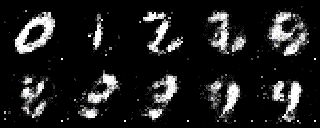

In [14]:
import glob
from PIL import Image
# filepaths
fp_in = "samples_500/*.png"
fp_out = "result.gif"
stop_while = 5
# https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html#gif
sorted_images = sorted(glob.glob(fp_in))

for i in range(5):
  sorted_images.append(sorted_images[-1])

img, *imgs = [Image.open(f).resize((320, 128), Image.NEAREST) for f in (sorted_images)]
img.save(fp=fp_out, format='GIF', append_images=imgs,
         save_all=True, duration=500, loop=0)

from IPython.display import Image, display
with open(fp_out,'rb') as f:
    display(Image(data=f.read(), format='png'))


# Training Step

using device cuda
Epoch [0/100], Step [300/600],d_loss: 0.83075321, g_loss: 1.18925822, D(x): 0.67, D(G(z)): 0.33
Epoch [0/100], Step [600/600],d_loss: 0.99629545, g_loss: 1.06473577, D(x): 0.58, D(G(z)): 0.34
Epoch [1/100], Step [300/600],d_loss: 0.97139978, g_loss: 1.04819441, D(x): 0.61, D(G(z)): 0.37
Epoch [1/100], Step [600/600],d_loss: 0.87613422, g_loss: 1.23082232, D(x): 0.64, D(G(z)): 0.32
Epoch [2/100], Step [300/600],d_loss: 0.89770210, g_loss: 1.19757330, D(x): 0.65, D(G(z)): 0.35
Epoch [2/100], Step [600/600],d_loss: 0.94515646, g_loss: 1.08447111, D(x): 0.64, D(G(z)): 0.36
Epoch [3/100], Step [300/600],d_loss: 0.97616053, g_loss: 1.35187125, D(x): 0.56, D(G(z)): 0.30
Epoch [3/100], Step [600/600],d_loss: 0.59526426, g_loss: 1.81048906, D(x): 0.70, D(G(z)): 0.19
Epoch [4/100], Step [300/600],d_loss: 0.82395995, g_loss: 1.39575195, D(x): 0.65, D(G(z)): 0.29
Epoch [4/100], Step [600/600],d_loss: 0.98363221, g_loss: 1.23480546, D(x): 0.65, D(G(z)): 0.36


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:163: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:165: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch [5/100], Step [300/600],d_loss: 0.82432640, g_loss: 1.29797757, D(x): 0.65, D(G(z)): 0.27
Epoch [5/100], Step [600/600],d_loss: 0.70577681, g_loss: 1.41895759, D(x): 0.81, D(G(z)): 0.36
Epoch [6/100], Step [300/600],d_loss: 0.57761371, g_loss: 1.69583678, D(x): 0.78, D(G(z)): 0.25
Epoch [6/100], Step [600/600],d_loss: 0.60982621, g_loss: 1.72513318, D(x): 0.71, D(G(z)): 0.21
Epoch [7/100], Step [300/600],d_loss: 0.85424626, g_loss: 1.33298445, D(x): 0.66, D(G(z)): 0.28
Epoch [7/100], Step [600/600],d_loss: 0.37200391, g_loss: 1.98512292, D(x): 0.89, D(G(z)): 0.21
Epoch [8/100], Step [300/600],d_loss: 0.39863306, g_loss: 2.07974005, D(x): 0.84, D(G(z)): 0.19
Epoch [8/100], Step [600/600],d_loss: 1.12220907, g_loss: 1.34967875, D(x): 0.53, D(G(z)): 0.30
Epoch [9/100], Step [300/600],d_loss: 0.57630521, g_loss: 1.51998568, D(x): 0.85, D(G(z)): 0.32
Epoch [9/100], Step [600/600],d_loss: 0.78483427, g_loss: 1.34936631, D(x): 0.68, D(G(z)): 0.29
Epoch [10/100], Step [300/600],d_loss: 0

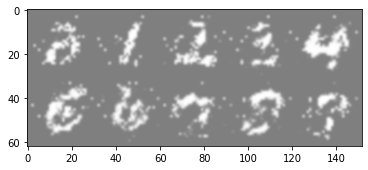

In [ ]:
import os
import torch
import torchvision
import torch.nn as nn
from torchvision import transforms
from torchvision.utils import save_image
from IPython.display import Image
import matplotlib.pyplot as plt

def grid_image(tensor_images, size=10, nrow=5):
  tensor_images = ((tensor_images + 1) / 2 ).clamp(0, 1)
  return torchvision.utils.make_grid(tensor_images[:size], nrow=nrow)

def show_image(tensor_images, size=10, nrow=5):
  to_pil = transforms.ToPILImage()
  grid_img = grid_image(tensor_images)
  plt.imshow(to_pil(grid_img), interpolation="bicubic")

class Discriminator(nn.Module):
  def __init__(self, image_size, hidden_size):
    super(Discriminator, self).__init__()
    condition_size = image_size
    self.main = nn.Sequential(
        nn.Linear(image_size+condition_size, hidden_size),
        nn.LeakyReLU(0.2),
        nn.Linear(hidden_size, hidden_size),
        nn.BatchNorm1d(hidden_size),
        nn.LeakyReLU(0.2),
        nn.Linear(hidden_size, hidden_size),
        nn.BatchNorm1d(hidden_size),
        nn.LeakyReLU(0.2),
        nn.Linear(hidden_size, 1),
        nn.Sigmoid()
    )
  def forward(self, image, y):
    y = y.repeat_interleave(image.shape[1]).view(image.shape[0], -1)
    x = torch.cat((image, y), 1)
    return self.main(x)

class Generator(nn.Module):
  def __init__(self, latent_size, hidden_size, image_size):
    super(Generator, self).__init__()
    condition_size = latent_size
    self.main = nn.Sequential(
        nn.Linear(latent_size + condition_size, hidden_size),
        nn.ReLU(0.2),
        nn.Linear(hidden_size, hidden_size),
        nn.BatchNorm1d(hidden_size),
        nn.ReLU(0.2),
        nn.Linear(hidden_size, hidden_size),
        nn.BatchNorm1d(hidden_size),
        nn.ReLU(0.2),
        nn.Linear(hidden_size, image_size),
        nn.Tanh()
    )
  def forward(self, z, y):
    y = y.repeat_interleave(z.shape[1]).view(z.shape[0], -1)
    z = torch.cat((z, y), 1)
    return self.main(z)

def binary_cross_entropy(out, target):
  return - torch.mean(target * torch.log(out + 1e-10) + (1-target) * torch.log(1-out+1e-10))

def main():
  
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  print(f"using device {device}")
  # Hyper-parameters

  latent_size = 64
  hidden_size = 256
  image_size = 784

  num_epochs = 100
  batch_size = 100
  sample_dir = 'samples_500'

  if not os.path.exists(sample_dir):
    os.makedirs(sample_dir)

  transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])                              
  ])

  mnist = torchvision.datasets.MNIST(root='../../data/',
                                    train=True,
                                    transform=transform,
                                    download=True)

  data_loader = torch.utils.data.DataLoader(dataset=mnist,
                                            batch_size=batch_size,
                                            shuffle=True)

  D = Discriminator(image_size, hidden_size).to(device)
  G = Generator(latent_size, hidden_size, image_size).to(device)

  criterion = nn.BCELoss()
  d_optimizer = torch.optim.Adam(D.parameters(), lr=0.0002)
  g_optimizer = torch.optim.Adam(G.parameters(), lr=0.0002)

  total_step = len(data_loader)
  def reset_grad():
    d_optimizer.zero_grad()
    g_optimizer.zero_grad()
  
  def rand_z(bat=batch_size, lat=latent_size):
    return torch.randn(bat, lat).to(device)

  for epoch in range(num_epochs):
    fake_images = None
    for i, (images, y) in enumerate(data_loader):
      images = images.view(batch_size, -1).to(device)
      y = y.to(device)

      real_label = torch.ones(batch_size, 1).to(device)
      fake_label = torch.zeros(batch_size, 1).to(device)

      # ---- D ----
      z = rand_z()

      # real
      real_outputs = D(images, y)
      d_loss_real = binary_cross_entropy(real_outputs, real_label)
      real_score = real_outputs

      # fake
      fake_images = G(z, y)
      fake_outputs = D(fake_images, y)
      d_loss_fake = binary_cross_entropy(fake_outputs, fake_label)
      fake_score = fake_outputs
      
      # loss
      d_loss = d_loss_real + d_loss_fake
      
      # backprop
      reset_grad()
      d_loss.backward()
      d_optimizer.step()

      # ---- G ----
      z = rand_z()
      fake_images = G(z, y)
      outputs = D(fake_images, y)
      g_loss = binary_cross_entropy(outputs, real_label)
      
      reset_grad()
      g_loss.backward()
      g_optimizer.step()

      if (i + 1) % 300 == 0:
        print(f'Epoch [{epoch}/{num_epochs}], Step [{i+1}/{total_step}],' + 
        f'd_loss: {d_loss:.8f}, g_loss: {g_loss:.8f}, ' + 
        f'D(x): {real_score.mean():.2f}, D(G(z)): {fake_score.mean():.2f}')

    if (epoch + 1) % 5 == 0:
      # save_image(grid_image(fake_images.view(batch_size, 1, 28, 28)),
      #            os.path.join(sample_dir, f'real_images_{epoch+1:03d}.png'))
      with torch.no_grad():
        zs = rand_z(10)
        test = torch.tensor([i for i in range(10)]).to(device).view(-1)
        images = G(zs, test)
        save_image(grid_image(torch.tensor(images).view(10, 1, 28, 28)),
                  os.path.join(sample_dir, f'fake_images_{epoch+1:03d}.png'))
        show_image(grid_image(torch.tensor(images).view(10, 1, 28, 28)))
    # if (epoch + 1) % 50 == 0:
    #   show_image(fake_images.view(batch_size, 1, 28, 28))
    
main()
